In [8]:
import pandas 
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

THINKING_CSV = 'thinking.csv'
READING_CSV = 'reading.csv'
MEDITATING_CSV = 'meditating.csv'

FREQ = 256

def plotFFT(csv):
    df =prepareEEGdata(csv)
    # df.plot()
    # remove outliers
    # df=df[np.abs(df.fp2-df.fp2.mean()) <= (100*df.fp2.std())]
    # df.plot()
    yf = scipy.fft(df.fp2.values)
    x = scipy.fftpack.fftfreq(yf.size, 1 / FREQ)
    # yf = yf/1000
    fig, axes = plt.subplots()
    axes.plot(np.abs(x), np.abs(yf))
    # axes.plot(x[:x.size//2], np.abs(yf)[:yf.size//2])
    # axes.set_aspect('equal')
    # axes.set_xlim([xmin,xmax])
    # ymin = 0
    # ymax = 20000
    # axes.set_ylim([ymin,ymax])
    plt.show()

def prepareEEGdata(csv):
    df = pandas.read_csv(csv)
    df = df.dropna(how='all', axis=1)
    df = df.rename(index=str, columns={'FP2-F4': 'fp2'})
    df = df[~df.fp2.str.contains("FP")]
    df = df.astype(float)
    df.fp2 = df.fp2.clip( lower = -600, upper = 600)
    df['diff1'] = df.fp2.diff()
    df['diff2'] = df.diff1.diff()
    df = df.dropna()
    display(df)
    df = convertToDateIndexFromNum(df)
    display(df)
    return df

def plotRange(df,dfCol,start,end):

    df.iloc[:df.fp2.size // 10].fp2.plot()
    # df.tail(1000).fp2.plot()
    plt.show()


def convertToDateIndexFromNum(df):
    df = df.reset_index(drop=True)
    df['id']=df.index
    df.index = df.index / FREQ
    df.index = pandas.to_datetime(df.index, unit='s')
    return df


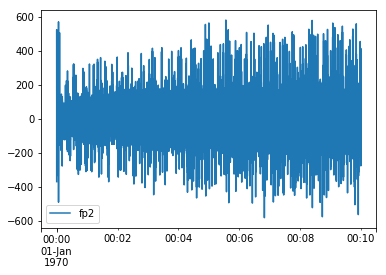

In [12]:
def resampleData(df,timeFrame, show):
    resampledData= pandas.DataFrame()
    resampledData['fp2'] = df.fp2.resample(timeFrame).mean()
    if (show):
        resampledData.plot().
        plt.show()
    return resampledData


In [3]:
df = prepareEEGdata(MEDITATING_CSV)

,fp2,diff1,diff2
2,-594.0,-308.0,-142.0
3,-600.0,-6.0,302.0
4,-563.0,37.0,43.0
5,-212.0,351.0,314.0
6,117.0,329.0,-22.0
7,391.0,274.0,-55.0
8,587.0,196.0,-78.0
9,600.0,13.0,-183.0
10,479.0,-121.0,-134.0
11,358.0,-121.0,0.0


,fp2,diff1,diff2,id
1970-01-01 00:00:00.000000,-594.0,-308.0,-142.0,0
1970-01-01 00:00:00.003906,-600.0,-6.0,302.0,1
1970-01-01 00:00:00.007812,-563.0,37.0,43.0,2
1970-01-01 00:00:00.011719,-212.0,351.0,314.0,3
1970-01-01 00:00:00.015625,117.0,329.0,-22.0,4
1970-01-01 00:00:00.019531,391.0,274.0,-55.0,5
1970-01-01 00:00:00.023438,587.0,196.0,-78.0,6
1970-01-01 00:00:00.027344,600.0,13.0,-183.0,7
1970-01-01 00:00:00.031250,479.0,-121.0,-134.0,8
1970-01-01 00:00:00.035156,358.0,-121.0,0.0,9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D95D87AFD0>]],
      dtype=object)

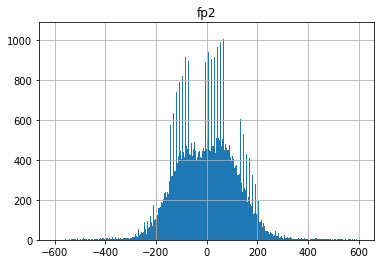

In [77]:
df = prepareEEGdata(MEDITATING_CSV)
df.hist(column='fp2',bins=1000)
# df.fp2.value_counts()